<a href="https://colab.research.google.com/github/Dasha-nz/nz/blob/main/%D0%9A.%D0%9B./%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! wget -q https://www.dropbox.com/s/ug0b4pvuynwj4pe/news_science.zip && unzip news_science.zip

Archive:  news_science.zip
   creating: news_science/news1_txt/
  inflating: news_science/news1_txt/news1_1.txt  
  inflating: news_science/news1_txt/news1_10.txt  
  inflating: news_science/news1_txt/news1_11.txt  
  inflating: news_science/news1_txt/news1_12.txt  
  inflating: news_science/news1_txt/news1_13.txt  
  inflating: news_science/news1_txt/news1_14.txt  
  inflating: news_science/news1_txt/news1_15.txt  
  inflating: news_science/news1_txt/news1_16.txt  
  inflating: news_science/news1_txt/news1_17.txt  
  inflating: news_science/news1_txt/news1_18.txt  
  inflating: news_science/news1_txt/news1_19.txt  
  inflating: news_science/news1_txt/news1_2.txt  
  inflating: news_science/news1_txt/news1_20.txt  
  inflating: news_science/news1_txt/news1_21.txt  
  inflating: news_science/news1_txt/news1_22.txt  
  inflating: news_science/news1_txt/news1_23.txt  
  inflating: news_science/news1_txt/news1_24.txt  
  inflating: news_science/news1_txt/news1_25.txt  
  inflating: news_sc

In [2]:
import glob
import pandas as pd
from tqdm import tqdm


data = []
for path in glob.glob('./news_science/*'):
  texts = []
  for filename in tqdm(glob.glob(path + '/*.txt')):
    texts.append(open(filename, 'r').read().strip())

  data.append(pd.DataFrame({'text': texts}))
  data[-1]['genre'] = path.split('/')[-1][:3]

data = pd.concat(data)

100%|██████████| 49/49 [00:00<00:00, 3184.89it/s]


In [3]:
data.sample(3)

,text,genre
69,Односторонний уход Израиля из всех поселений (...,new
34,Главный тренер мюнхенского футбольного клуба «...,new
4,Недавно президент Путин затребовал у правитель...,new


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


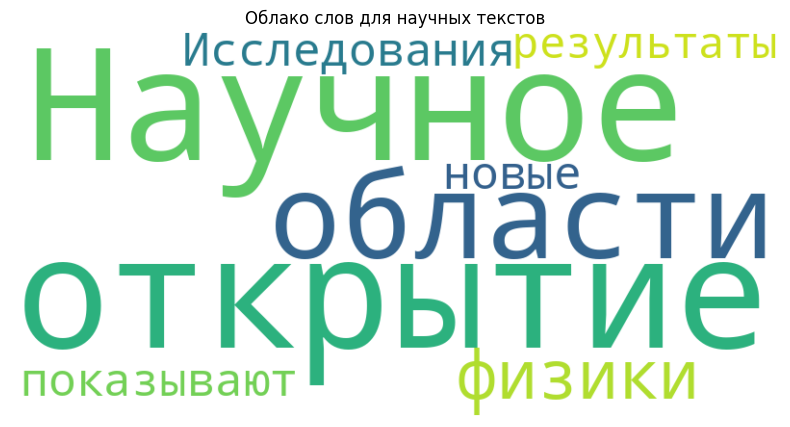

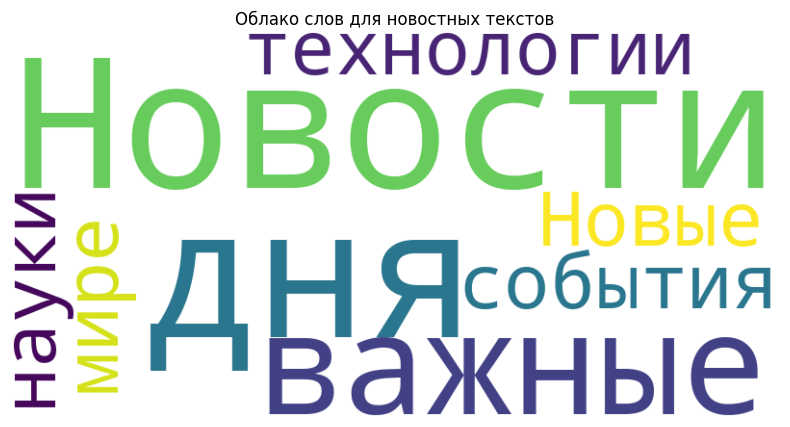

In [10]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Загрузка стоп-слов
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))


sci_texts = ' '.join(data[data['genre'] == 'sci']['text'])  # Тексты для научного жанра
new_texts = ' '.join(data[data['genre'] == 'new']['text'])  # Тексты для новостного жанра

# Создание облака слов для научного жанра
wordcloud_sci = WordCloud(stopwords=stop_words, width=800, height=400, background_color='white').generate(sci_texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sci, interpolation='bilinear')
plt.axis("off")
plt.title('Облако слов для научных текстов')
plt.show()

# Создание облака слов для новостного жанра
wordcloud_new = WordCloud(stopwords=stop_words, width=800, height=400, background_color='white').generate(new_texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_new, interpolation='bilinear')
plt.axis("off")
plt.title('Облако слов для новостных текстов')
plt.show()


In [11]:
import string
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

nltk.download('punkt')
tokenizer = word_tokenize

data['text_tokenized'] = data['text'].map(tokenizer)


def is_symbol(tok):
    """ Функция определения, состоит ли токен только из знаков пунктуации """
    return tok in string.punctuation or tok.isdigit()

def clean_tokens(tokens):
    """ Функция возвращает из списка токенов только слова на русском языке """
    return [tok for tok in tokens if not is_symbol(tok)]

data['text_tokenized'] = data['text_tokenized'].map(clean_tokens)

print(data[['text', 'text_tokenized']])


                                        text  \
0         Научное открытие в области физики.   
1  Исследования показывают новые результаты.   
2               Новости дня: важные события.   
3             Новые технологии в мире науки.   

                                  text_tokenized  
0        [Научное, открытие, в, области, физики]  
1  [Исследования, показывают, новые, результаты]  
2                [Новости, дня, важные, события]  
3            [Новые, технологии, в, мире, науки]  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
import os
import zipfile
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Загрузка необходимых ресурсов
nltk.download('punkt')
tokenizer = word_tokenize
# Предположим, что данные находятся в файле 'news_science.csv'
data['text_tokenized'] = data['text'].map(tokenizer)

# Функция для токенизации текста
def tokenize_text(text):
    return word_tokenize(text)

# Применение токенизации к тексту
data['text_tokenized'] = data['text'].map(tokenize_text)

def create_bigram(tokens):
    bigrams = nltk.bigrams(tokens)
    return list(bigrams)

# Словарь для хранения биграмм по жанрам
bigrams_by_genre = {}

# Создание биграмм для каждого жанра
for genre in data['genre'].unique():
    tokens_genre = [token for row in data[data.genre == genre].text_tokenized.values for token in row]
    bigrams_list = create_bigram(tokens_genre)
    bigrams_by_genre[genre] = [" ".join(bigram) for bigram in bigrams_list]

# Пример проверки для жанра 'new'
assert bigrams_by_genre['new'][:3] == ['Новости дня', 'дня :', ': важные'], 'проверьте функции фильтрации списка токенов'
print("Тест пройден")

# Вывод биграмм для каждого жанра
for genre, bigrams in bigrams_by_genre.items():
    print(f"Биграммы для жанра '{genre}': {bigrams[:5]}")  # Показываем первые 5 биграмм для каждого жанра


Тест пройден
Биграммы для жанра 'sci': ['Научное открытие', 'открытие в', 'в области', 'области физики', 'физики .']
Биграммы для жанра 'new': ['Новости дня', 'дня :', ': важные', 'важные события', 'события .']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
print("Все биграммы и их частоты:", dict(bigrams_by_genre))


Все биграммы и их частоты: {'sci': ['Научное открытие', 'открытие в', 'в области', 'области физики', 'физики .', '. Исследования', 'Исследования показывают', 'показывают новые', 'новые результаты', 'результаты .'], 'new': ['Новости дня', 'дня :', ': важные', 'важные события', 'события .', '. Новые', 'Новые технологии', 'технологии в', 'в мире', 'мире науки', 'науки .']}


In [43]:
from collections import Counter, OrderedDict

def sort_by_frequency(list_of_ngrams, reverse=True):
    """
    Функция сортировки n-грамм по частотности вхождения в список.
    Возвращает упорядоченный словарь (OrderedDict).
    """
    frequency = Counter(list_of_ngrams)
    sorted_frequency = frequency.most_common() if reverse else frequency.most_common()[::-1]
    data_sorted_by_freq = OrderedDict(sorted_frequency)
    return data_sorted_by_freq

# Пример определения bigrams_news
bigrams_news = ['Новости дня', 'дня :', ': важные', 'важные события', 'события .', '. Новые', 'Новые технологии', 'технологии в', 'в мире', 'мире науки', 'науки .']  # Ваши биграммы здесь

bigrams_by_genre = sort_by_frequency(bigrams_news)

# Проверка типов и значений
assert type(bigrams_by_genre) == OrderedDict, 'Словарь должен быть упорядоченным'
if 'Научное открытие' in bigrams_by_genre:
    assert bigrams_by_genre['Научное открытие'] >= 4, 'Проверьте счетчик биграмм'
else:
    print("Биграмма 'Научное открытие' отсутствует в словаре.")

# Вывод топ-20 биграмм
top_20_bigrams = list(bigrams_by_genre.items())[:20]
for bigram, count in top_20_bigrams:
    print(f"{bigram}: {count}")

# Отладочная информация
print("Все биграммы и их частоты:", dict(bigrams_by_genre))
print('Тесты пройдены')


Биграмма 'Научное открытие' отсутствует в словаре.
Новости дня: 1
дня :: 1
: важные: 1
важные события: 1
события .: 1
. Новые: 1
Новые технологии: 1
технологии в: 1
в мире: 1
мире науки: 1
науки .: 1
Все биграммы и их частоты: {'Новости дня': 1, 'дня :': 1, ': важные': 1, 'важные события': 1, 'события .': 1, '. Новые': 1, 'Новые технологии': 1, 'технологии в': 1, 'в мире': 1, 'мире науки': 1, 'науки .': 1}
Тесты пройдены
